

# Covid-19 status in Madrid by Zones 

In [3]:
import numpy as np
from utils.utils import loadData, comparePlaces, plotPlaces
%matplotlib inline

In [4]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

## Load data from the official source

In [ ]:
!wget https://datos.comunidad.madrid/catalogo/dataset/7da43feb-8d4d-47e0-abd5-3d022d29d09e/resource/b2a3a3f9-1f82-42c2-89c7-cbd3ef801412/download/covid19_tia_muni_y_distritos.csv --no-check-certificat -O datasets/covid19_tia_muni_y_distritos.csv

In [5]:
df = loadData()

## List of locations to observe

In [ ]:
madrid_places = df[df['municipio_distrito_clean'].str.startswith('Madrid')]['municipio_distrito_clean'].unique()
loc_places = np.array(['Getafe','Leganés','Fuenlabrada','Alcorcón','Móstoles','Parla',
                       'Alcalá de Henares','Torrejón de Ardoz','Coslada',
                       'Pozuelo de Alarcón','Majadahonda','Las Rozas de Madrid','Collado Villalba'])
places = np.concatenate([madrid_places, loc_places])

In [ ]:
comparePlaces(df,places)

In [ ]:
plotPlaces(df,places)

## Analisys of reasons 

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df_pob_muni = pd.read_csv('datasets/municipio_comunidad_madrid.csv', sep=';', encoding='latin-1')

In [82]:
df_pob_muni_simple = df_pob_muni[['municipio_nombre','superficie_km2','densidad_por_km2']];

In [86]:
df_pob_muni_simple.head()

,municipio_nombre,superficie_km2,densidad_por_km2
0,Acebeda (La),21.86,3.02
1,Ajalvir,19.80,225.00
2,Alameda del Valle,25.70,7.74
3,Alamo (El),22.00,415.86
4,Alcalá de Henares,88.11,2205.31


In [83]:
df_pob_dist = pd.read_csv('datasets/distritos_municipio_madrid.csv', sep=';', encoding='latin-1')

In [24]:
df_res = pd.read_csv('datasets/servicios_sociales_registro_centros.csv', sep=';', encoding='latin-1')

In [62]:
df_res_simple = df_res[(df_res['sector']=='Personas mayores') & (df_res['subtipo'].str.contains('RESIDENCIAS'))][['plazas_autorizadas_numero','municipio_nombre']];

In [75]:
df_res_simple = df_res_simple.groupby(by='municipio_nombre').sum()

In [87]:
df_res_simple.head()

,plazas_autorizadas_numero
municipio_nombre,
Alcalá de Henares,1644
Alcobendas,1095
Alcorcón,692
Aldea del Fresno,165
Algete,261


In [88]:
df_cm = pd.read_csv('datasets/cm.csv', sep=';', encoding='latin-1')

In [90]:
df_cm[df_cm['municipio_nombre']=='Getafe'].head()

,municipio_codigo,municipio_nombre,sexo,rango_edad,poblacion_empadronada
2688,65,Getafe,Hombre,De 0 a 4 años,4956
2689,65,Getafe,Hombre,De 5 a 9 años,4967
2690,65,Getafe,Hombre,De 10 a 14 años,4588
2691,65,Getafe,Hombre,De 15 a 19 años,4015
2692,65,Getafe,Hombre,De 20 a 24 años,4021


In [91]:
def showPopulationAgeProfile(df, city):
    plt.figure(figsize=(20,7))
    df_ob=df[df['municipio_nombre']==city]
    sns.barplot(data=df_ob, x='rango_edad',y='poblacion_empadronada', hue='sexo')
    plt.xticks(rotation=45)

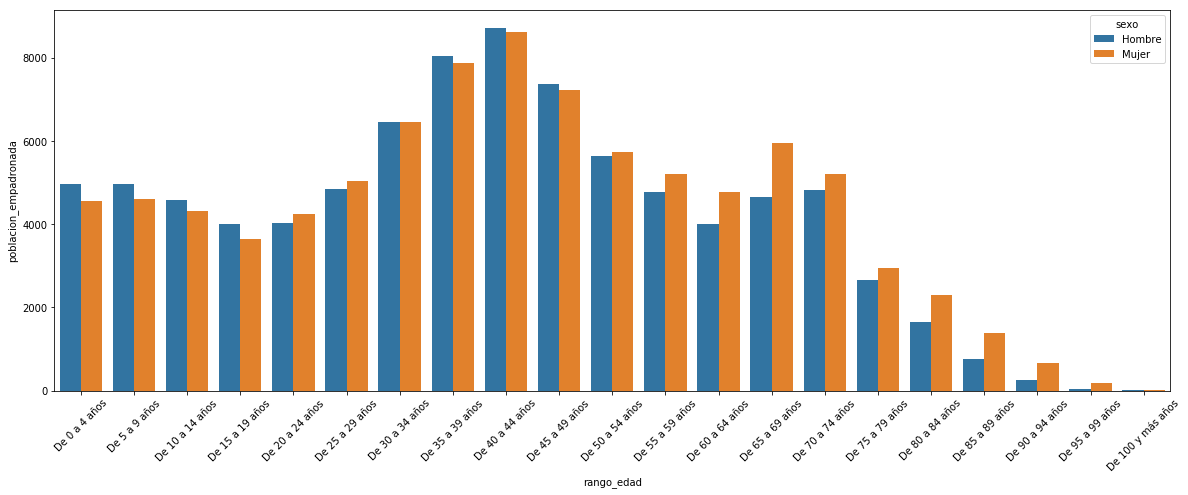

In [92]:
showPopulationAgeProfile(df_cm, 'Getafe')

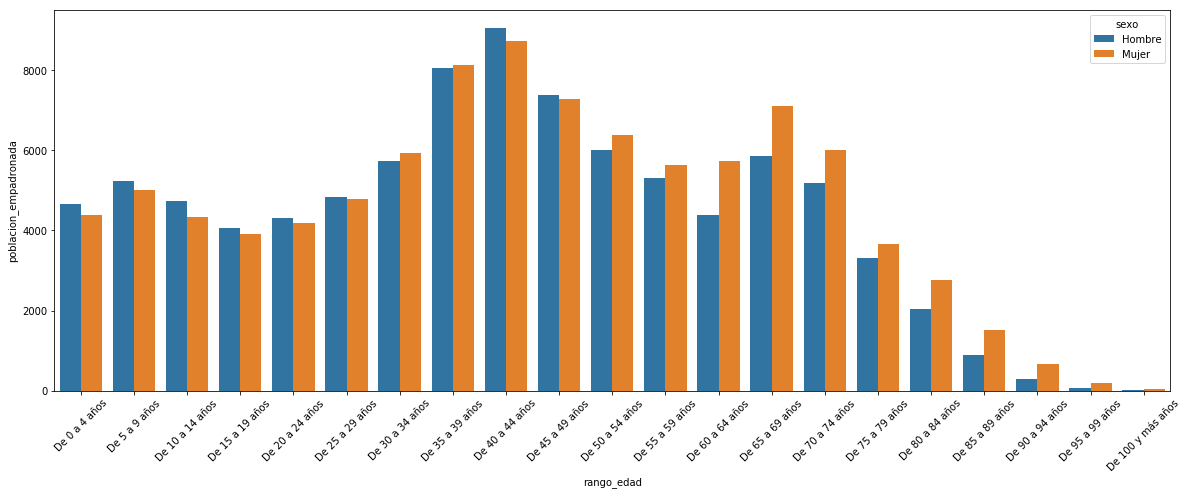

In [94]:
showPopulationAgeProfile(df_cm, 'Leganés')

#  End of analysis!